# Prueba técnica 

## 1. 

Para esta prueba se tienen dos conjuntos de datos en archivos `.csv` los cuales son `DB_1` y `DB_2`. 

El primero (`DB_1`) tiene los datos de los clientes, y estos datos estan separados por:

* Ocuupation
* Monthly Income 
* Credit Score
* Years of Employment 
* Finance Status
* Finance History 
* Car 
* Number of Children

El segundo (`DB_2`) nos da los precios y características de ciertos carros de la siguiente forma:

* ID
* Price 
* Levy 
* Manufacturer 
* Model
* Prod. year 
* Category 
* Leather interior
* Fuel type 
* Engine volume 
* Mileage 
* Cylinders 
* Gear box type
* Drive wheels 
* Doors 
* Wheel 
* Color
* Airbags 

El objetivo de estos datos que en un principio no estan directamente relacionados es obtener alguna métrica o valores con los cuales dar una recomendación al negocio de que personas serian más factibles de compra o para un prestramo o financiación. 




In [47]:
# llamemos a las funciones para abrir los archivos y visualizarlos 

import pandas as pd
import numpy as np  # por si toca hacer algún calculo 
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#como estoy en la misma carpeta se pueda abrir in el path completo los archivos 

db1 = pd.read_csv('DB_1.csv')
db2 = pd.read_csv('DB_2.csv')

# exploremos los archivos, aunque esto es más fácil con una extensión de vs code (DW), pero para la muestra miraremos el head de los dos archivos 
db1.head(), db2.head()
#lala

(    Occupation Monthly Income  Credit Score Years of Employment  \
 0      Teacher          40000         750.0                  10   
 1     Engineer          60000         800.0                   8   
 2        Nurse          25000         650.0                   5   
 3       Doctor          80000         900.0                  12   
 4  Businessman         100000         700.0                  15   
 
   Finance Status            Finance History  Car Number of Children  
 0           Good                  No issues  Yes                  2  
 1           Good                  No issues  Yes                  1  
 2           Fair  Late payment 2 months ago   No                  0  
 3      Excellent                  No issues  Yes                  3  
 4           Good  Late payment 6 months ago  Yes                  2  ,
          ID  Price  Levy Manufacturer    Model  Prod. year   Category  \
 0  45654403  13328  1399        LEXUS   RX 450        2010       Jeep   
 1  44731507  1

Se observan varios vacios en los datos, diferentes tipos de datos como son en el caso de precios que estan como números o strings, también varios valores que son strings y para la maquina es más fácil si son números. Por lo tanto toca hacer una limpieza de varios valores y rellenar o borrar ciertos campos y valores. 

## 2.  Limpieza y procesamiento 

Primero para el caso db1

In [ ]:
# primero eliminar las filas que no tienen ningún valor, como es el caso de la fila 10 en el archivo db1, o filas que les falte más de 5 valores. 
# Ya que significaria que no tenemos mucha información del cliente 
db1 = pd.read_csv('DB_1.csv')

db1 = db1.dropna(thresh=3)
#db c
# Lo mejor es que las columnas solo sean de un tipo, especificamente seria que fueran números y no strings  
def convertir_precio(valor):
    # volver los valores en números 
    if not valor or (isinstance(valor, str) and valor.strip() == ''):  
        return None
    if isinstance(valor, str):  
        valor = valor.replace('$', '').replace('USD', '').replace(',','').replace(' usd','').strip().lower()  
        if 'k' in valor:  
            valor = float(valor.replace('k', '')) * 1000
        return int(float(valor))  
    
def remove_year(valor):
    if isinstance(valor, str):
        valor = valor.lower().replace(' years','').replace(' y','').replace('ear','')
        return int(float(valor))

def remove_na(valor):
    if isinstance(valor,str):
        valor = valor.replace('na','')
        return valor
        
db1['Monthly Income'] = db1['Monthly Income'].apply(convertir_precio)
db1['Years of Employment'] = db1['Years of Employment'].apply(remove_year)
db1['Car'] = db1['Car'].map({'Yes':1, 'No':0}) 
db1['Number of Children'] = db1['Number of Children'].apply(remove_na)
db1['Number of Children'] = pd.to_numeric(db1['Number of Children'], errors='coerce')

# se deberia mapear el 'Finance status', pero áca si seria mejor consultar en un futuro bien la escala, por el momento manejara la siguiente
db1['Finance Status numbers'] = db1['Finance Status'].map({'Poor': 0, 'Unstable': 1, 'Fair': 2, 'Stable':3,'Good': 4, 'Excellent': 5, 'Unkonw':0,})



Limpieza para el caso db2 

In [50]:
db2 = pd.read_csv('DB_2.csv')

db2['Gear box type numbers'] = db2['Gear box type'].map({'Automatic':0, 'Manual':1, "Variator":2, "Tiptronic":3})
db2['Mileage'] = db2['Mileage'].str.extract(r'(\d+)', expand=False).astype(float)
db2['Engine volume'] = db2['Engine volume'].str.extract(r'(\d+)', expand=False).astype(float)
db2['Fuel type numbers'] = db2['Fuel type'].map({'Hybrid':0, 'Petrol':1, 'Diesel':2, 'CNG':3, 'LPG':3, 'Plug-in Hybrid':4})
db2['Leather interior numbers'] = db2['Leather interior'].map({'Yes':1, 'No':0})
db2['Doors'] = db2['Doors'].str.extract(r'(\d+)', expand=False).astype(float)
db2['Wheel numbers'] = db2['Wheel'].map({'Right-hand drive':1, 'Left wheel':0})
db2['Drive wheels numbers'] = db2['Drive wheels'].map({'4x4':0, 'Front':1, 'Rear':2})
db2['Levy'] = pd.to_numeric(db2['Levy'], errors='coerce')


In [51]:
import webcolors 

def color_to_hex(color_name):
    # Diccionario con colores personalizados
    custom_colors = {
        'sky blue': '#87ceeb',
        'golden': '#ffd700',
        'carnelian red': '#b31b1b'
    } 
    # Primero, intentar obtener el color de la librería webcolors
    try:
        return webcolors.name_to_hex(color_name.lower())
    except ValueError:
        # Si no está en webcolors, buscar en el diccionario personalizado
        return custom_colors.get(color_name.lower(), None)

db2['color_hex'] = db2['Color'].apply(color_to_hex)

In [52]:
db1.head(2), db2.head(2)

(  Occupation  Monthly Income  Credit Score  Years of Employment  \
 0    Teacher         40000.0         750.0                 10.0   
 1   Engineer         60000.0         800.0                  8.0   
 
   Finance Status Finance History  Car  Number of Children  \
 0           Good       No issues  1.0                 2.0   
 1           Good       No issues  1.0                 1.0   
 
    Finance Status numbers  
 0                     4.0  
 1                     4.0  ,
          ID  Price    Levy Manufacturer    Model  Prod. year Category  \
 0  45654403  13328  1399.0        LEXUS   RX 450        2010     Jeep   
 1  44731507  16621  1018.0    CHEVROLET  Equinox        2011     Jeep   
 
   Leather interior Fuel type  Engine volume  ...  Doors       Wheel   Color  \
 0              Yes    Hybrid            3.0  ...    4.0  Left wheel  Silver   
 1               No    Petrol            3.0  ...    4.0  Left wheel   Black   
 
   Airbags  Gear box type numbers Fuel type numbers 

## 3. EDA

In [53]:
db1.describe()

,Monthly Income,Credit Score,Years of Employment,Car,Number of Children,Finance Status numbers
count,483.000000,460.000000,457.000000,480.000000,346.000000,476.000000
mean,7689.248447,702.969565,4.509847,0.627083,1.040462,2.665966
std,13276.331889,69.232323,2.676328,0.484085,0.925380,1.044170
min,7.000000,500.000000,1.000000,0.000000,0.000000,0.000000
25%,3500.000000,650.000000,3.000000,0.000000,0.000000,2.000000
50%,4800.000000,700.000000,4.000000,1.000000,1.000000,3.000000
75%,7200.000000,750.000000,6.000000,1.000000,2.000000,3.000000
max,120000.000000,900.000000,20.000000,1.000000,4.000000,5.000000


In [54]:
db2.describe()

,ID,Price,Levy,Prod. year,Engine volume,Mileage,Cylinders,Doors,Airbags,Gear box type numbers,Fuel type numbers,Leather interior numbers,Wheel numbers,Drive wheels numbers
count,1.923700e+04,1.923700e+04,13418.000000,19237.000000,19237.000000,1.923700e+04,19237.000000,19237.000000,19237.000000,19237.000000,19236.000000,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,906.838128,2010.912824,1.936009,1.532236e+06,4.582991,3.925872,6.582627,0.658783,1.181327,0.725373,0.077143,0.908874
std,9.365914e+05,1.905813e+05,461.867051,5.668673,0.918328,4.840387e+07,1.199933,0.403399,4.320168,1.126909,0.831519,0.446338,0.266825,0.567875
min,2.074688e+07,1.000000e+00,87.000000,1939.000000,0.000000,0.000000e+00,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.569837e+07,5.331000e+03,640.000000,2009.000000,1.000000,7.013900e+04,4.000000,4.000000,4.000000,0.000000,1.000000,0.000000,0.000000,1.000000
50%,4.577231e+07,1.317200e+04,781.000000,2012.000000,2.000000,1.260000e+05,4.000000,4.000000,6.000000,0.000000,1.000000,1.000000,0.000000,1.000000
75%,4.580204e+07,2.207500e+04,1058.000000,2015.000000,2.000000,1.888880e+05,4.000000,4.000000,12.000000,1.000000,2.000000,1.000000,0.000000,1.000000
max,4.581665e+07,2.630750e+07,11714.000000,2020.000000,20.000000,2.147484e+09,16.000000,5.000000,16.000000,3.000000,4.000000,1.000000,1.000000,2.000000


Primero miraremos las características del primer set db1 

In [55]:
db1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 485 entries, 0 to 499
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Occupation              485 non-null    object 
 1   Monthly Income          483 non-null    float64
 2   Credit Score            460 non-null    float64
 3   Years of Employment     457 non-null    float64
 4   Finance Status          477 non-null    object 
 5   Finance History         472 non-null    object 
 6   Car                     480 non-null    float64
 7   Number of Children      346 non-null    float64
 8   Finance Status numbers  476 non-null    float64
dtypes: float64(6), object(3)
memory usage: 37.9+ KB


Occupation                  0
Monthly Income              2
Credit Score               25
Years of Employment        28
Finance Status              8
Finance History            13
Car                         5
Number of Children        139
Finance Status numbers      9
dtype: int64


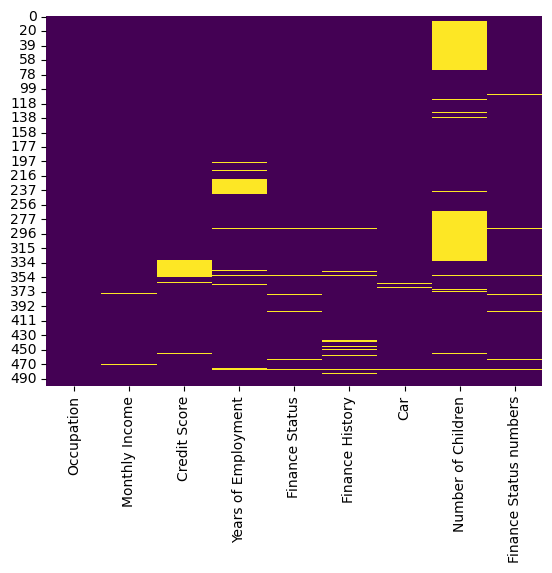

In [56]:
# Ver valores nulos por columna
print(db1.isnull().sum())

# Visualizar la proporción de valores nulos
sns.heatmap(db1.isnull(), cbar=False, cmap='viridis')
plt.show()


       Monthly Income  Credit Score  Years of Employment         Car  \
count      483.000000    460.000000           457.000000  480.000000   
mean      7689.248447    702.969565             4.509847    0.627083   
std      13276.331889     69.232323             2.676328    0.484085   
min          7.000000    500.000000             1.000000    0.000000   
25%       3500.000000    650.000000             3.000000    0.000000   
50%       4800.000000    700.000000             4.000000    1.000000   
75%       7200.000000    750.000000             6.000000    1.000000   
max     120000.000000    900.000000            20.000000    1.000000   

       Number of Children  Finance Status numbers  
count          346.000000              476.000000  
mean             1.040462                2.665966  
std              0.925380                1.044170  
min              0.000000                0.000000  
25%              0.000000                2.000000  
50%              1.000000              

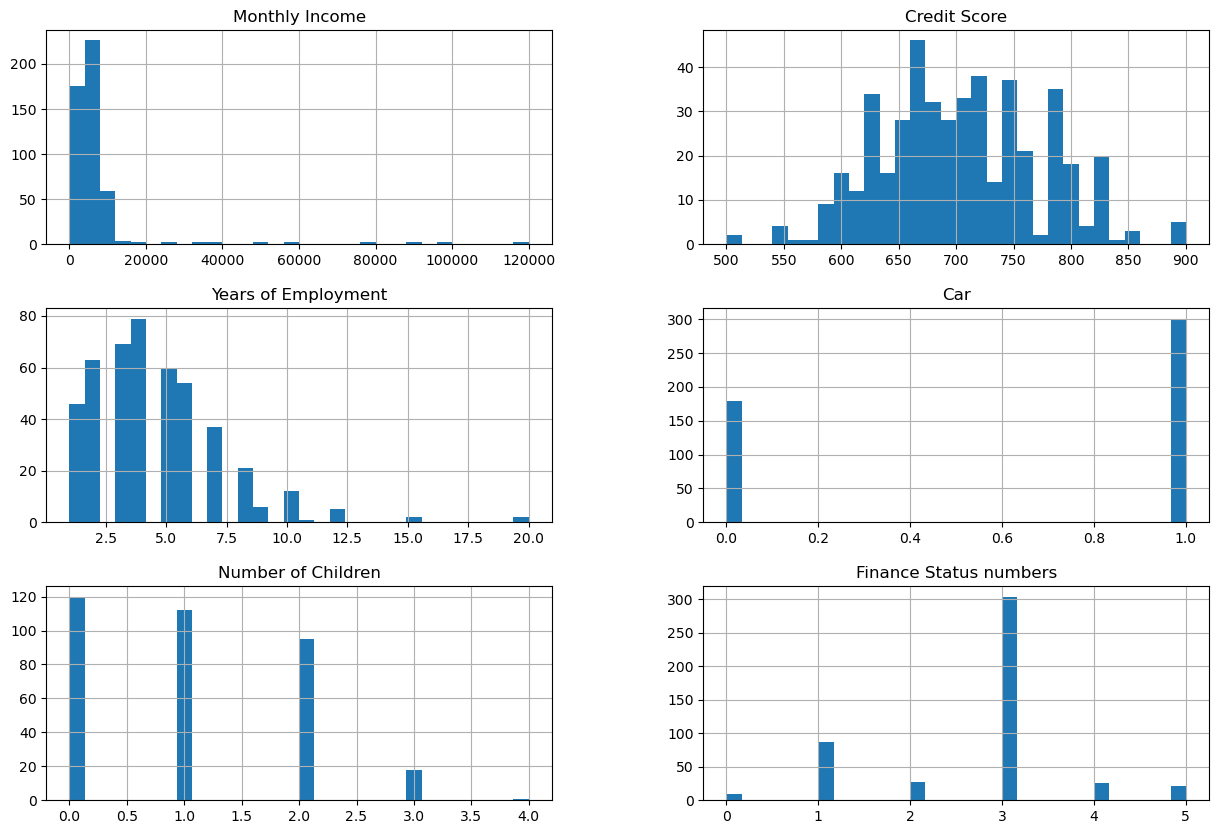

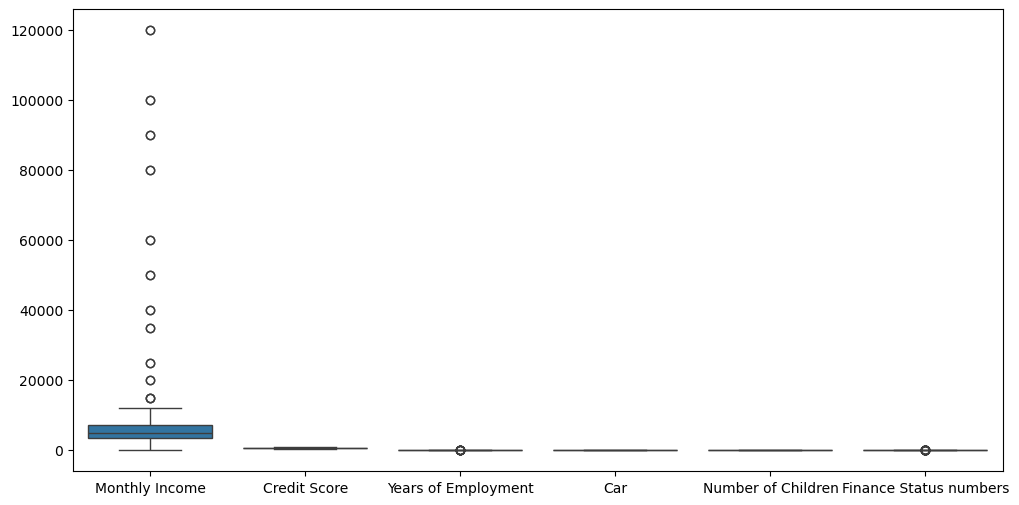

In [57]:
# Estadísticas descriptivas
print(db1.describe())

# Visualizar la distribución con histogramas
db1.hist(bins=30, figsize=(15,10))
plt.show()

# Diagrama de caja para ver outliers
plt.figure(figsize=(12,6))
sns.boxplot(data=db1)
plt.show()


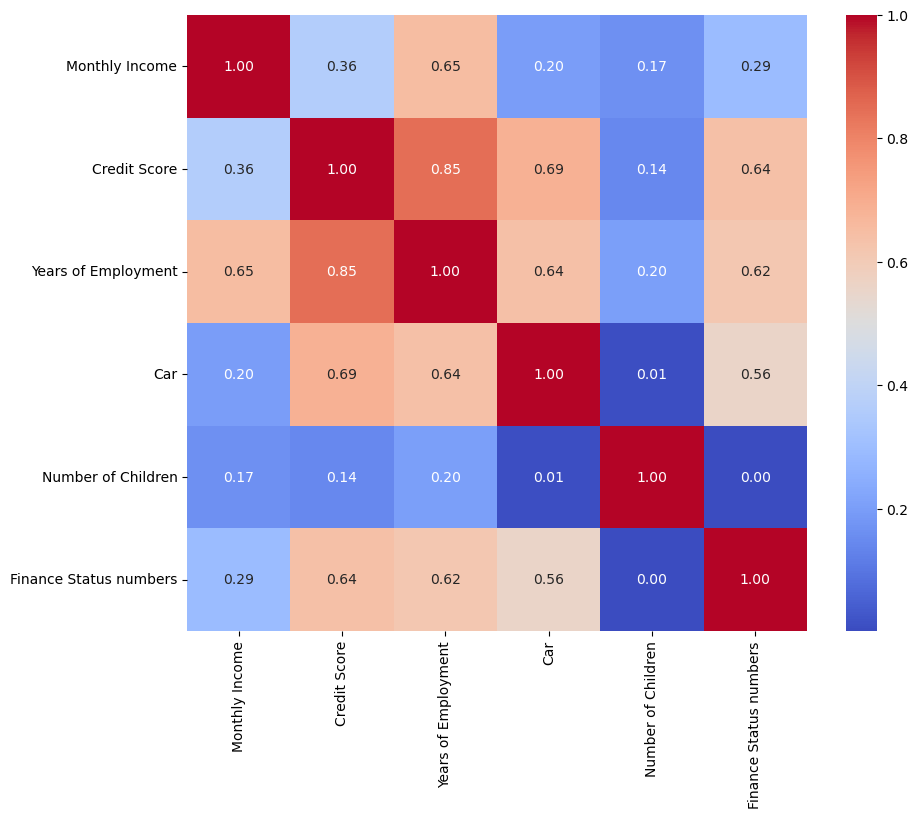

In [58]:
# Correlación entre variables numéricas
df_numeric = db1.select_dtypes(include=['number'])
corr = df_numeric.corr()

# Mapa de calor de la correlación
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()


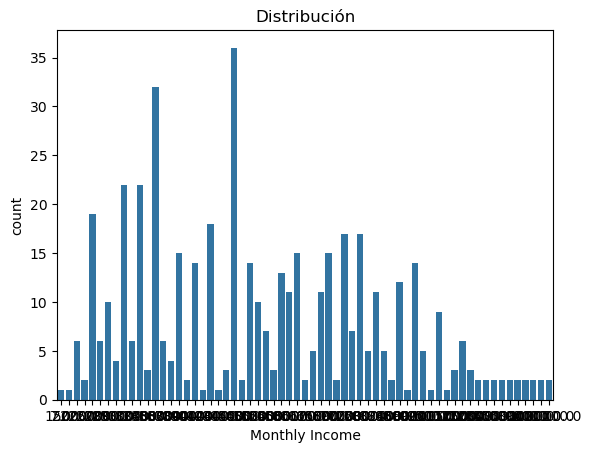

In [59]:
sns.countplot(x='Monthly Income', data=db1)
plt.title("Distribución")
plt.show()

Ahora para el segundo caso db2 

In [60]:
db2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        19237 non-null  int64  
 1   Price                     19237 non-null  int64  
 2   Levy                      13418 non-null  float64
 3   Manufacturer              19237 non-null  object 
 4   Model                     19237 non-null  object 
 5   Prod. year                19237 non-null  int64  
 6   Category                  19237 non-null  object 
 7   Leather interior          19237 non-null  object 
 8   Fuel type                 19237 non-null  object 
 9   Engine volume             19237 non-null  float64
 10  Mileage                   19237 non-null  float64
 11  Cylinders                 19237 non-null  float64
 12  Gear box type             19237 non-null  object 
 13  Drive wheels              19237 non-null  object 
 14  Doors 

ID                             0
Price                          0
Levy                        5819
Manufacturer                   0
Model                          0
Prod. year                     0
Category                       0
Leather interior               0
Fuel type                      0
Engine volume                  0
Mileage                        0
Cylinders                      0
Gear box type                  0
Drive wheels                   0
Doors                          0
Wheel                          0
Color                          0
Airbags                        0
Gear box type numbers          0
Fuel type numbers              1
Leather interior numbers       0
Wheel numbers                  0
Drive wheels numbers           0
color_hex                      0
dtype: int64


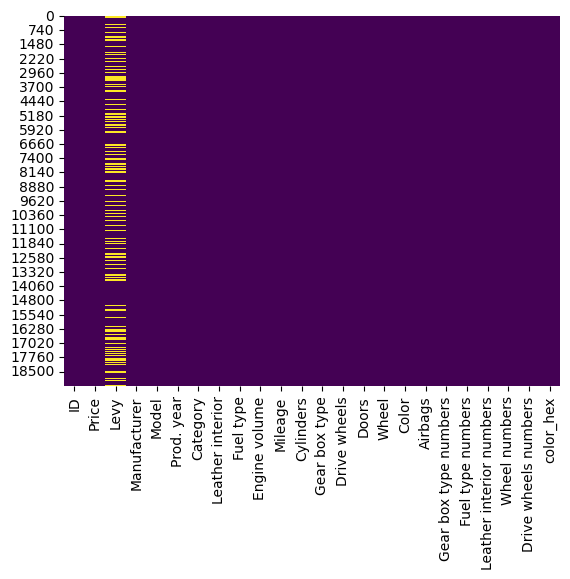

In [61]:
# Ver valores nulos por columna
print(db2.isnull().sum())

# Visualizar la proporción de valores nulos
sns.heatmap(db2.isnull(), cbar=False, cmap='viridis')
plt.show()

                 ID         Price          Levy    Prod. year  Engine volume  \
count  1.923700e+04  1.923700e+04  13418.000000  19237.000000   19237.000000   
mean   4.557654e+07  1.855593e+04    906.838128   2010.912824       1.936009   
std    9.365914e+05  1.905813e+05    461.867051      5.668673       0.918328   
min    2.074688e+07  1.000000e+00     87.000000   1939.000000       0.000000   
25%    4.569837e+07  5.331000e+03    640.000000   2009.000000       1.000000   
50%    4.577231e+07  1.317200e+04    781.000000   2012.000000       2.000000   
75%    4.580204e+07  2.207500e+04   1058.000000   2015.000000       2.000000   
max    4.581665e+07  2.630750e+07  11714.000000   2020.000000      20.000000   

            Mileage     Cylinders         Doors       Airbags  \
count  1.923700e+04  19237.000000  19237.000000  19237.000000   
mean   1.532236e+06      4.582991      3.925872      6.582627   
std    4.840387e+07      1.199933      0.403399      4.320168   
min    0.000000e+00

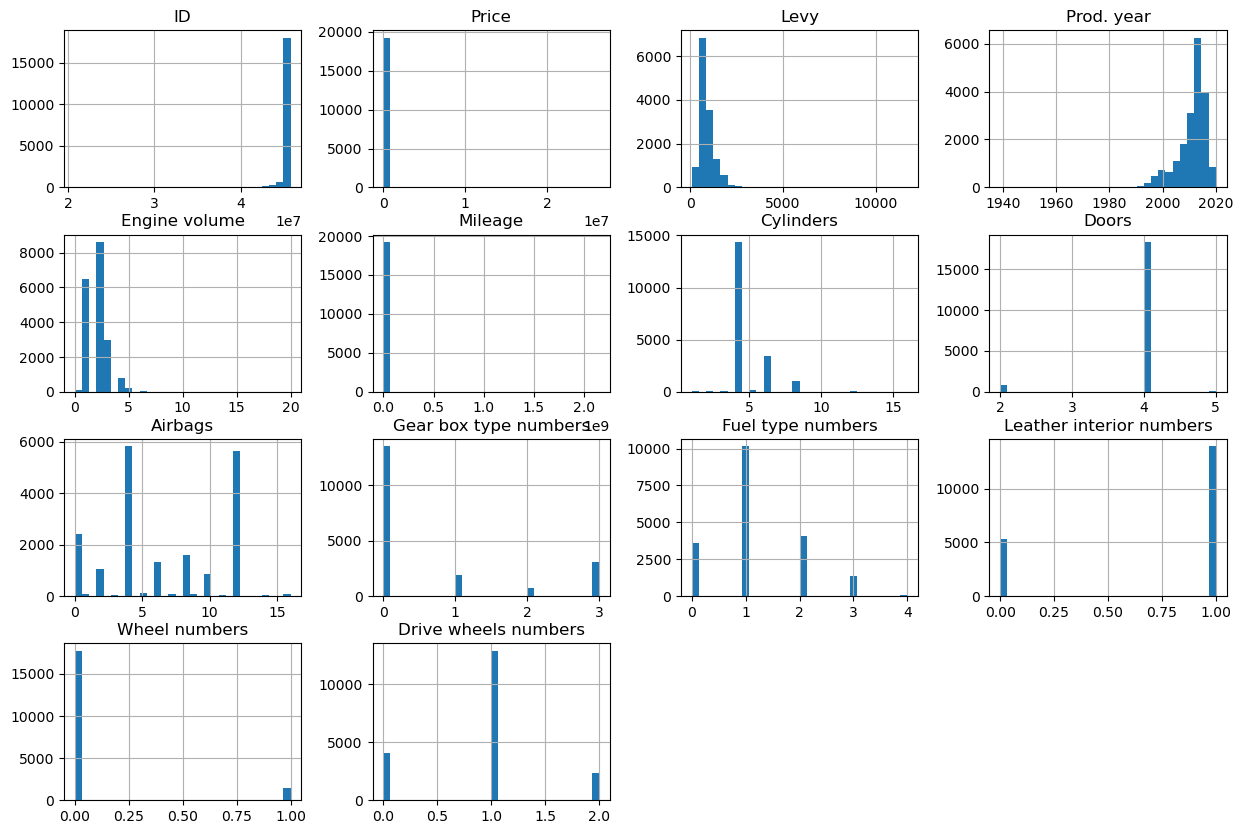

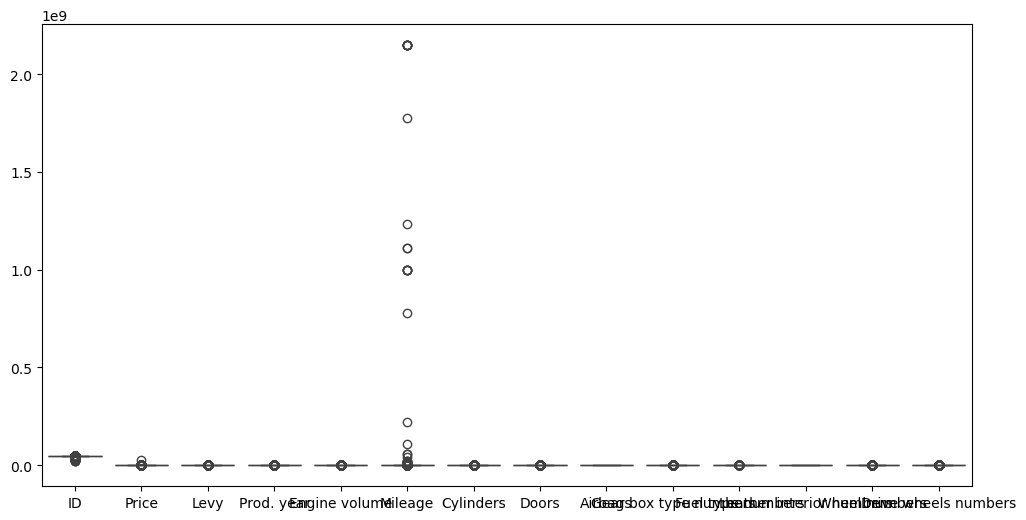

In [62]:
print(db2.describe())

db2.hist(bins=30, figsize=(15,10))
plt.show()

plt.figure(figsize=(12,6))
sns.boxplot(data=db2)
plt.show()

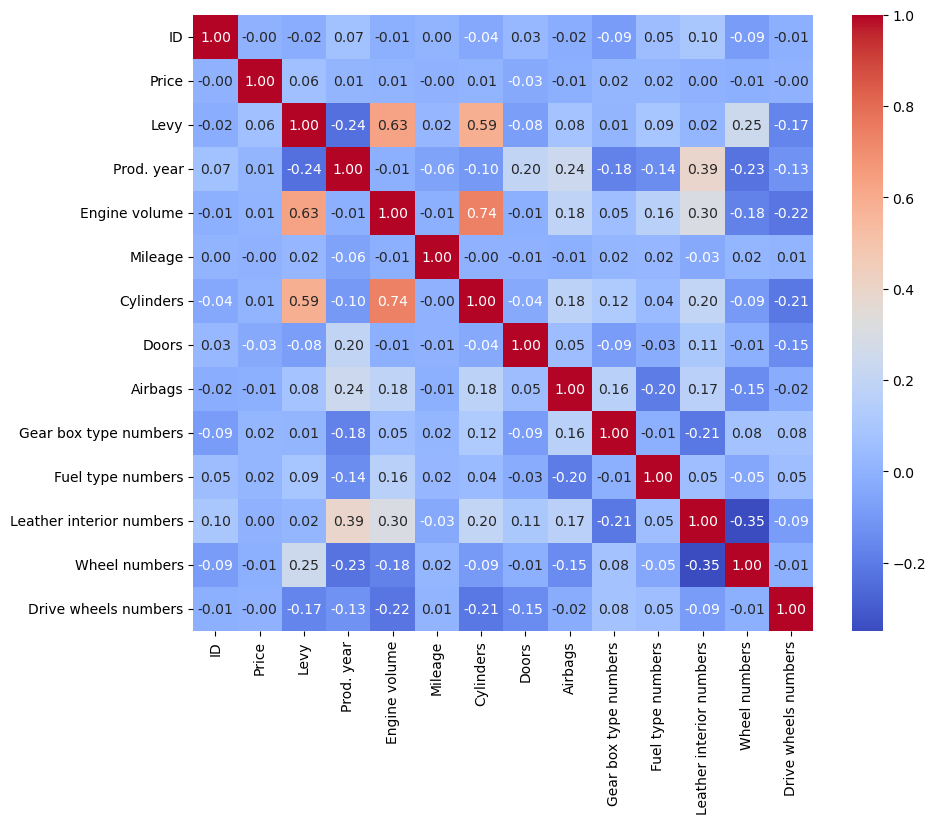

In [63]:
df_numeric2 = db2.select_dtypes(include=['number'])
corr = df_numeric2.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

En este segundo set se puede observar una gran correlación entre volumen y cilindros, lo cual tiene mucha lógica, debido a que mayor número de cílindros mayor volumen se necesita en el motor. Y una sútil en el caso de leather con el año de producción, que pued ellegar a deberse a alguna moda de epoca.

## 4. 

Se tienen que seleccionar las características más relevantes y crear variables que puedan a llegar a darnos más información de las personas y de los carros. Usualmente se calculan ratios para saber esas tasas de diferencia.
Debido a que en este set se desconoce varios 

In [64]:
db1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 485 entries, 0 to 499
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Occupation              485 non-null    object 
 1   Monthly Income          483 non-null    float64
 2   Credit Score            460 non-null    float64
 3   Years of Employment     457 non-null    float64
 4   Finance Status          477 non-null    object 
 5   Finance History         472 non-null    object 
 6   Car                     480 non-null    float64
 7   Number of Children      346 non-null    float64
 8   Finance Status numbers  476 non-null    float64
dtypes: float64(6), object(3)
memory usage: 37.9+ KB


In [65]:
# Debt-to-Income Ratio
db1['Debt-to-Income Ratio'] = db1['Finance Status numbers'] / db1['Monthly Income']

# Income per Dependent
db1['Income per Dependent'] = db1['Monthly Income'] / (db1['Number of Children'] + 1)



In [66]:
db2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        19237 non-null  int64  
 1   Price                     19237 non-null  int64  
 2   Levy                      13418 non-null  float64
 3   Manufacturer              19237 non-null  object 
 4   Model                     19237 non-null  object 
 5   Prod. year                19237 non-null  int64  
 6   Category                  19237 non-null  object 
 7   Leather interior          19237 non-null  object 
 8   Fuel type                 19237 non-null  object 
 9   Engine volume             19237 non-null  float64
 10  Mileage                   19237 non-null  float64
 11  Cylinders                 19237 non-null  float64
 12  Gear box type             19237 non-null  object 
 13  Drive wheels              19237 non-null  object 
 14  Doors 

In [67]:
from datetime import datetime

current_year = int(datetime.now().year)
print(current_year)
# Car Age
db2['Car Age'] = current_year - db2['Prod. year']

# Price-to-Mileage Ratio
db2['Price-to-Mileage Ratio'] = db2['Price'] / db2['Mileage']

# Depreciation Rate
db2['Depreciation Rate'] = (db2['Price'] - db2['Levy']) / db2['Car Age']

db2.replace([np.inf, -np.inf], 10**7, inplace=True)

2025


In [68]:
# Vamos a crear un df que tenga los datos de las personas y unas estadísticas de los carros
db3 = pd.DataFrame(data={'avg_car_price':np.zeros(500)})
db3['avg_car_price'] = db2['Price'].mean()
db3['median_car_price'] = db2['Price'].median()
db3['Price-to-Mileage-Ratio-avg'] = db2["Price-to-Mileage Ratio"].mean()

df_combined = pd.concat([db1, db3], axis=1)

# Income-to-Car Price Ratio
df_combined['Income-to-Car Price Ratio'] = df_combined['Monthly Income'] / df_combined['avg_car_price']


In [69]:
df_combined.info()


<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 0 to 478
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Occupation                  485 non-null    object 
 1   Monthly Income              483 non-null    float64
 2   Credit Score                460 non-null    float64
 3   Years of Employment         457 non-null    float64
 4   Finance Status              477 non-null    object 
 5   Finance History             472 non-null    object 
 6   Car                         480 non-null    float64
 7   Number of Children          346 non-null    float64
 8   Finance Status numbers      476 non-null    float64
 9   Debt-to-Income Ratio        474 non-null    float64
 10  Income per Dependent        344 non-null    float64
 11  avg_car_price               500 non-null    float64
 12  median_car_price            500 non-null    float64
 13  Price-to-Mileage-Ratio-avg  500 non-null

Como parametros mas importantes se podria tomar los siguientes: 'Monthly Income', 'Credit Score', 'Years of Employment', 'Debt-to-Income Ratio', 'Income per Dependent', 'Price', 'Car Age', 'Price-to-Mileage Ratio', 'Depreciation Rate', 'Income-to-Car Price Ratio'

## 5. Modelo Predictivo

In [70]:
db1.describe()

,Monthly Income,Credit Score,Years of Employment,Car,Number of Children,Finance Status numbers,Debt-to-Income Ratio,Income per Dependent
count,483.000000,460.000000,457.000000,480.000000,346.000000,476.000000,474.000000,344.000000
mean,7689.248447,702.969565,4.509847,0.627083,1.040462,2.665966,0.001411,4026.841085
std,13276.331889,69.232323,2.676328,0.484085,0.925380,1.044170,0.019663,4521.370968
min,7.000000,500.000000,1.000000,0.000000,0.000000,0.000000,0.000000,500.000000
25%,3500.000000,650.000000,3.000000,0.000000,0.000000,2.000000,0.000353,1900.000000
50%,4800.000000,700.000000,4.000000,1.000000,1.000000,3.000000,0.000462,2833.333333
75%,7200.000000,750.000000,6.000000,1.000000,2.000000,3.000000,0.000667,4425.000000
max,120000.000000,900.000000,20.000000,1.000000,4.000000,5.000000,0.428571,33333.333333


In [71]:
#vamos a llenar los valores nulos con medias, para no tener valores extremos ni sesgados en el analisis 

df_combined.fillna({
    'Monthly Income': df_combined['Monthly Income'].mean(),
    'Credit Score': df_combined['Credit Score'].mean(),
    'Debt-to-Income Ratio': df_combined['Debt-to-Income Ratio'].mean(),
    'Income per Dependent': df_combined['Income per Dependent'].median(),
    'avg_car_price': df_combined['avg_car_price'].mean(),
    'median_car_price': df_combined['median_car_price'].median(),
    'Price-to-Mileage-Ratio-avg': df_combined['Price-to-Mileage-Ratio-avg'].mean(),
}, inplace=True)

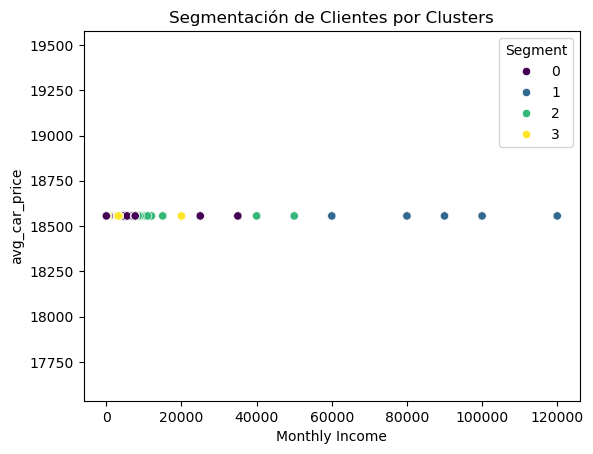

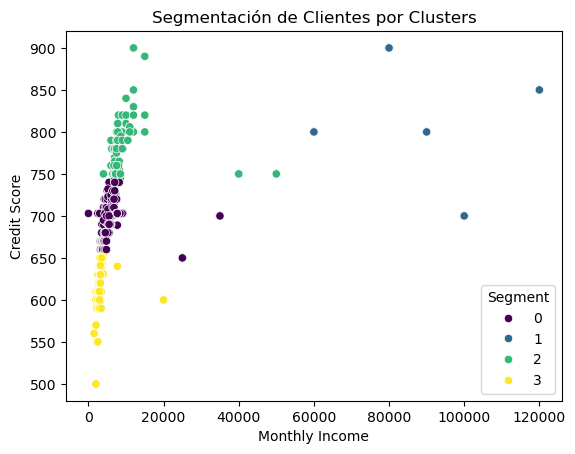

In [72]:
# vamos a clasificar un pequeño grupo de las características, para apreciar de una forma más fácil como trabajaria el modelo
# luego si se hara un custering de todos las metricas 

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Seleccionar características para clustering
features = ['Monthly Income', 'Credit Score', 'avg_car_price', 'median_car_price']
scaler = StandardScaler()
X = scaler.fit_transform(df_combined[features])

# K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=30)
df_combined['Segment'] = kmeans.fit_predict(X)

# Visualizar clusters
sns.scatterplot(data=df_combined, x='Monthly Income', y='avg_car_price', hue='Segment', palette='viridis')
plt.title("Segmentación de Clientes por Clusters")
plt.show()

# Visualizar clusters
sns.scatterplot(data=df_combined, x='Monthly Income', y='Credit Score', hue='Segment', palette='viridis')
plt.title("Segmentación de Clientes por Clusters")
plt.show()



In [73]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

numerical_features = [
            'Monthly Income', 'Credit Score', 'Years of Employment',
            'Car', 'Number of Children', 'Finance Status numbers',
            'Debt-to-Income Ratio', 'Income per Dependent',
            'avg_car_price', 'median_car_price',
            'Price-to-Mileage-Ratio-avg', 'Income-to-Car Price Ratio'
        ]
categorical_features = ['Occupation', 'Finance Status', 'Finance History']
    
df_cop = df_combined.copy()

num_imputer = SimpleImputer(strategy='median')
num_scaler = StandardScaler()
        
cat_imputer = SimpleImputer(strategy='constant', fill_value='missing')
label_encoders = {feature: LabelEncoder() for feature in categorical_features}
        
# numerical data
num_data = pd.DataFrame(num_imputer.fit_transform(df_cop[numerical_features]), columns=numerical_features)
        
# Replace infinite values with NaN and then impute
num_data = num_data.replace([np.inf, -np.inf], np.nan)
num_data = pd.DataFrame(num_imputer.fit_transform(num_data), columns=numerical_features)
        
num_data_scaled = pd.DataFrame(num_scaler.fit_transform(num_data),columns=numerical_features)
        
# Process categorical data
cat_data = pd.DataFrame(cat_imputer.fit_transform(df_cop[categorical_features]),columns=categorical_features)
        
# Encode categorical variables
encoded_cat_data = pd.DataFrame()
for feature in categorical_features:
    encoded_cat_data[feature] = label_encoders[feature].fit_transform(cat_data[feature])
        
# Combine all features
processed_data = pd.concat([num_data_scaled, encoded_cat_data], axis=1)
processed_data_unscaled = pd.concat([num_data, encoded_cat_data], axis=1)

kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(processed_data)        
df_cop['Cluster'] = clusters
        



Para la predicción se va a usar Random Forest y se van a ver los valores o métricas con MSE Y MAE 

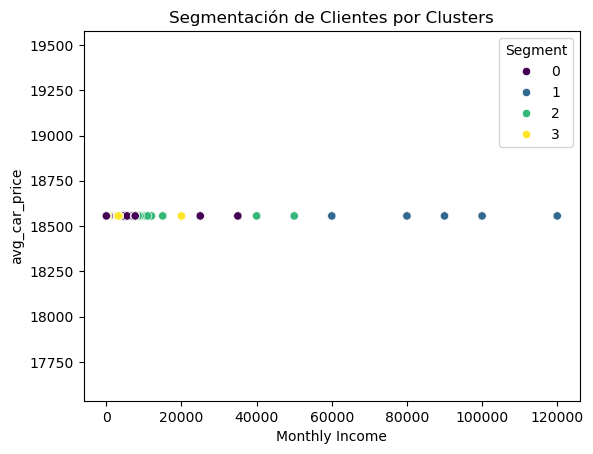

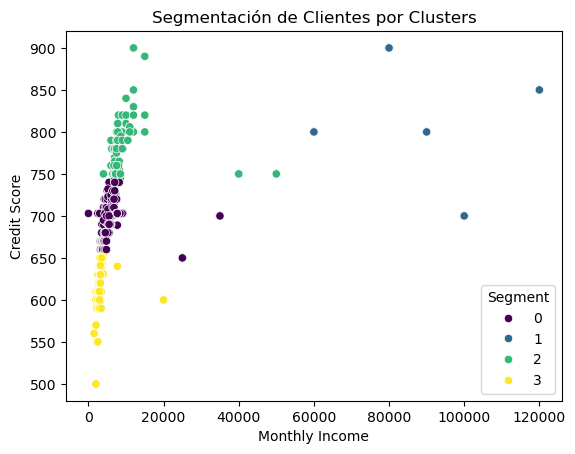

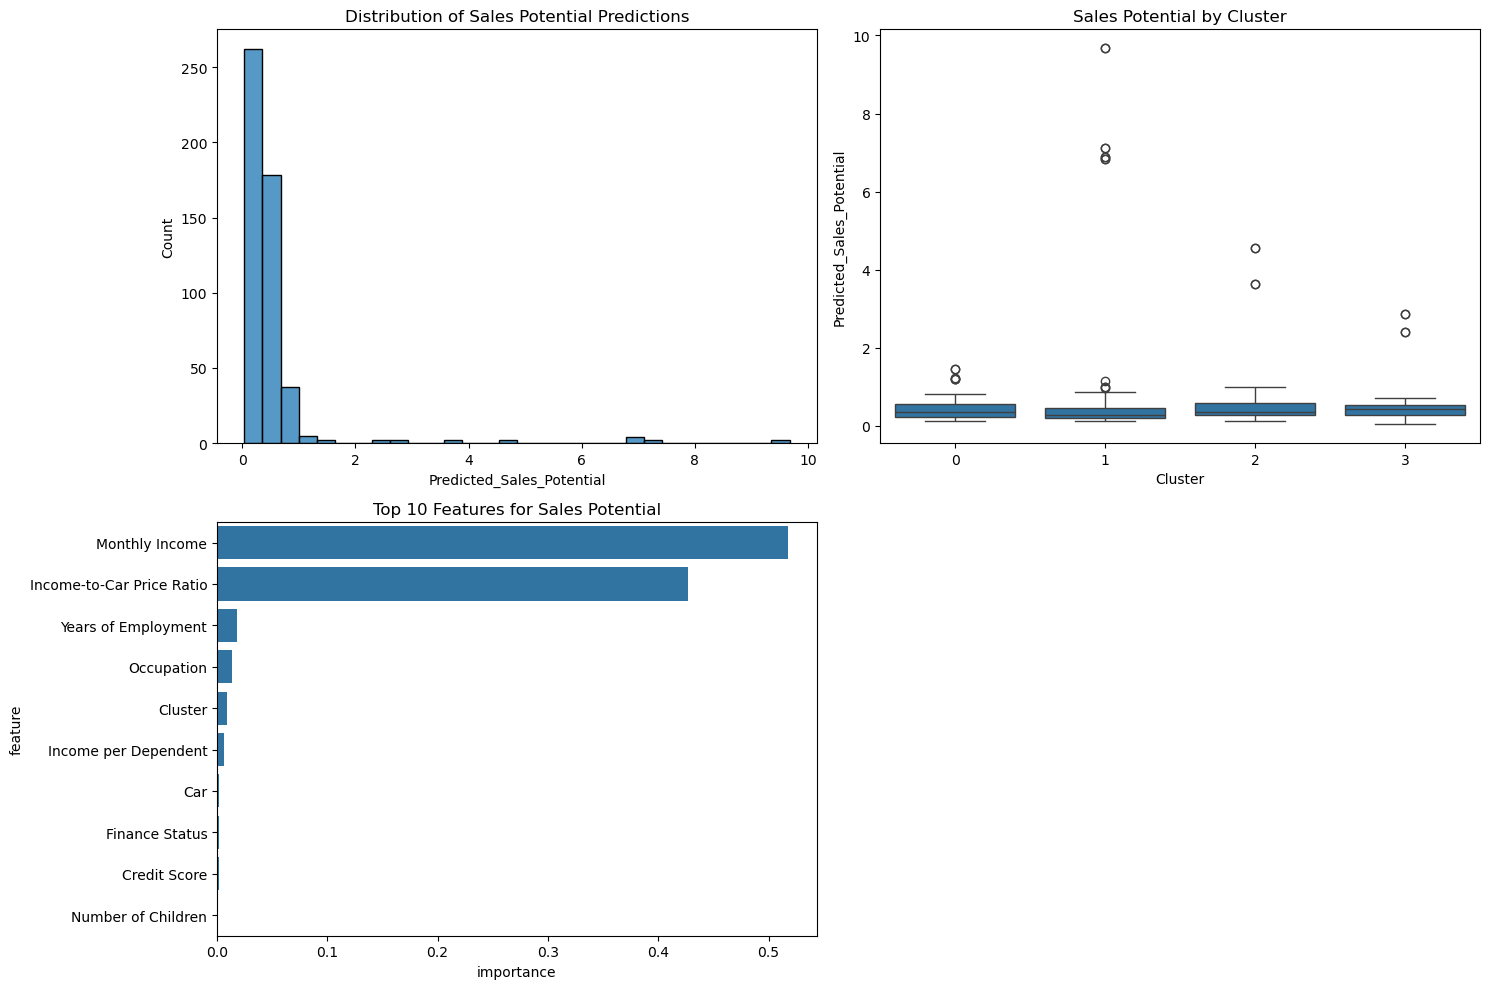


Model Performance Metrics:
MAE (Train): 0.0065
MAE (Test): 0.0060
RMSE (Train): 0.0316
RMSE (Test): 0.0169

Cluster Prediction Summary:
        Predicted_Sales_Potential                  
                             mean   min   max   std
Cluster                                            
0                            0.43  0.13  1.46  0.28
1                            0.71  0.12  9.67  1.64
2                            0.56  0.12  4.55  0.73
3                            0.47  0.04  2.87  0.43

Top 10 Sales Prospects:
      Occupation  Monthly Income  Credit Score Finance Status  \
8    Businessman        120000.0         850.0      Excellent   
268  Businessman        120000.0         850.0      Excellent   
9         Doctor         90000.0         800.0           Good   
269       Doctor         90000.0         800.0           Good   
3         Doctor         80000.0         900.0      Excellent   
263       Doctor         80000.0         900.0      Excellent   
4    Businessman   

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

class CarSalesAnalyzer:
    def __init__(self, df):
        self.numerical_features = [
            'Monthly Income', 'Credit Score', 'Years of Employment',
            'Car', 'Number of Children', 'Finance Status numbers',
            'Debt-to-Income Ratio', 'Income per Dependent',
            'avg_car_price', 'median_car_price',
            'Price-to-Mileage-Ratio-avg', 'Income-to-Car Price Ratio'
        ]
        self.categorical_features = ['Occupation', 'Finance Status', 'Finance History']
        self.df = df.copy()
    
        
    def preprocess_data(self):  # simplemente para limpiar cierta data
        num_imputer = SimpleImputer(strategy='median')
        num_scaler = StandardScaler()
        
        cat_imputer = SimpleImputer(strategy='constant', fill_value='missing')
        self.label_encoders = {feature: LabelEncoder() for feature in self.categorical_features}
        
        num_data = pd.DataFrame(num_imputer.fit_transform(self.df[self.numerical_features]),columns=self.numerical_features)
        
        num_data = num_data.replace([np.inf, -np.inf], np.nan)
        num_data = pd.DataFrame(num_imputer.fit_transform(num_data),columns=self.numerical_features)
        
        num_data_scaled = pd.DataFrame(num_scaler.fit_transform(num_data),columns=self.numerical_features)
        
        cat_data = pd.DataFrame(cat_imputer.fit_transform(self.df[self.categorical_features]),columns=self.categorical_features)
        
        encoded_cat_data = pd.DataFrame()
        for feature in self.categorical_features:
            encoded_cat_data[feature] = self.label_encoders[feature].fit_transform(cat_data[feature])
        
        self.processed_data = pd.concat([num_data_scaled, encoded_cat_data], axis=1)
        self.processed_data_unscaled = pd.concat([num_data, encoded_cat_data], axis=1)
        
        return self.processed_data
    
    def perform_clustering(self, n_clusters=4):
        self.kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        self.clusters = self.kmeans.fit_predict(self.processed_data)
        
        # Add clusters to original dataframe
        self.df['Cluster'] = self.clusters
        
        return self.clusters
    
    def plots_cluster(self):
        # Visualizar clusters
        sns.scatterplot(data=self.df, x='Monthly Income', y='avg_car_price', hue='Segment', palette='viridis')
        plt.title("Segmentación de Clientes por Clusters")
        plt.show()

        # Visualizar clusters
        sns.scatterplot(data=self.df, x='Monthly Income', y='Credit Score', hue='Segment', palette='viridis')
        plt.title("Segmentación de Clientes por Clusters")
        plt.show()

    
    def predict_sales_potential(self):
        features = self.processed_data_unscaled.copy()
        features['Cluster'] = self.clusters
        
        monthly_income = np.clip(features['Monthly Income'], 1, None)
        debt_ratio = np.clip(features['Debt-to-Income Ratio'], 0.1, 10)
        credit_score = np.clip(features['Credit Score'], 300, 850)
        years_emp = np.clip(features['Years of Employment'], 0, 50)
        avg_car_value = features['avg_car_price'].mean()
        
        # Este valor me lo estoy inventando de acuerdo a los valores conocidos 
        sales_potential = ((monthly_income / avg_car_value) * (credit_score / 750) )
        
        # 0-10, 10 es que si lo va a comprar
        sales_potential = (sales_potential - sales_potential.min()) / (sales_potential.max() - sales_potential.min()) * 10
        
        X_train, X_test, y_train, y_test = train_test_split(features, sales_potential, test_size=0.2, random_state=42)
        
        self.model = RandomForestRegressor(n_estimators=50, random_state=42)
        self.model.fit(X_train, y_train)
        
        train_predictions = self.model.predict(X_train)
        test_predictions = self.model.predict(X_test)
        
        metrics = {
            'MAE (Train)': mean_absolute_error(y_train, train_predictions),
            'MAE (Test)': mean_absolute_error(y_test, test_predictions),
            'RMSE (Train)': np.sqrt(mean_squared_error(y_train, train_predictions)),
            'RMSE (Test)': np.sqrt(mean_squared_error(y_test, test_predictions))
        }
        
        feature_importance = pd.DataFrame({'feature': features.columns,'importance': self.model.feature_importances_}).sort_values('importance', ascending=False)
        
        all_predictions = self.model.predict(features)
        
        self.df['Predicted_Sales_Potential'] = all_predictions
        
        cluster_predictions = self.df.groupby('Cluster').agg({'Predicted_Sales_Potential': ['mean', 'min', 'max', 'std']}).round(2)
        
        plt.figure(figsize=(15, 10))
        
        plt.subplot(2, 2, 1)
        sns.histplot(data=self.df, x='Predicted_Sales_Potential', bins=30)
        plt.title('Distribution of Sales Potential Predictions')
        
        plt.subplot(2, 2, 2)
        sns.boxplot(data=self.df, x='Cluster', y='Predicted_Sales_Potential')
        plt.title('Sales Potential by Cluster')
        
        plt.subplot(2, 2, 3)
        sns.barplot(data=feature_importance.head(10), x='importance', y='feature')
        plt.title('Top 10 Features for Sales Potential')
        
        plt.tight_layout()
        plt.show()
        
        return {
            'predictions': self.df[['Cluster', 'Predicted_Sales_Potential']],
            'metrics': metrics,
            'cluster_predictions': cluster_predictions,
            'feature_importance': feature_importance
        }

    def get_top_prospects(self, n=10):
        if not hasattr(self.df, 'Predicted_Sales_Potential'):
            raise ValueError("Run predict_sales_potential")
            
        top_prospects = self.df.nlargest(n, 'Predicted_Sales_Potential')
        return top_prospects[[
            'Occupation', 'Monthly Income', 'Credit Score',
            'Finance Status', 'Predicted_Sales_Potential', 'Cluster'
        ]]
        

analyzer = CarSalesAnalyzer(df_combined)
analyzer.preprocess_data()
analyzer.perform_clustering(n_clusters=4)
analyzer.plots_cluster()
results = analyzer.predict_sales_potential()

print("\nModel Performance Metrics:")
for metric, value in results['metrics'].items():
    print(f"{metric}: {value:.4f}")

print("\nCluster Prediction Summary:")
print(results['cluster_predictions'])

print("\nTop 10 Sales Prospects:")
print(analyzer.get_top_prospects(n=10))

predictions = results['predictions']

## Predicción prestamos :

In [75]:
parametros = ['Monthly Income', 'Credit Score', 'Years of Employment',
    'Debt-to-Income Ratio', 'Income per Dependent','avg_car_price',
    'median_car_price', 'Price-to-Mileage-Ratio-avg', 
    'Income-to-Car Price Ratio']

# df_combined2 = pd.concat([df_combined, db2], axis=1)
X = df_combined[parametros]

df_combined['Loan Approved'] = (
    (df_combined['Monthly Income'] > 7000) &
    (df_combined['Credit Score'] > 650) &
    (df_combined['Debt-to-Income Ratio'] < 0.1)
).astype(int)  # 1 para aprobado, 0 para rechazado

# ya que estoy suponiendo que todo estos datos es para un prestamo, entonces vamos a simular datos de aprovado o no aprovado.
# La gracia seria tener datos originales que me mostraran ya casos del pasado en donde se hicieron prestamos




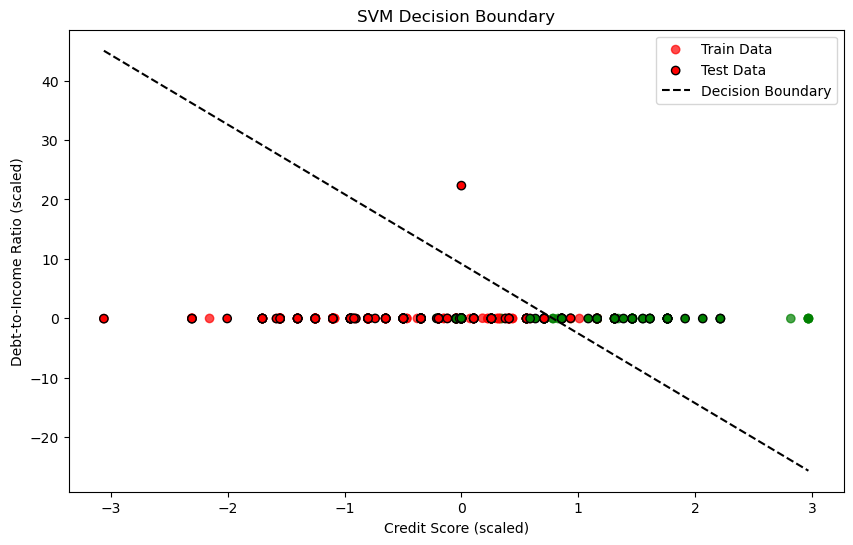

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap

# Seleccionar solo dos características relevantes para facilitar la visualización
features = ['Credit Score', 'Debt-to-Income Ratio']
X = df_combined[features].dropna()
y = df_combined['Loan Approved'][X.index]

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

# Entrenar el modelo SVM
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Obtener coeficientes de la frontera
w = svm_model.coef_[0]
intercept = svm_model.intercept_
slope = -w[0] / w[1]  # Pendiente de la línea
intercept_line = -intercept / w[1]  # Intersección con el eje y

# Visualizar los datos y el boundary
custom_cmap = ListedColormap(['red', 'green'])
plt.figure(figsize=(10, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=custom_cmap, alpha=0.7, label='Train Data')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=custom_cmap, edgecolor='k', label='Test Data')

# Crear la línea de decisión
x_range = np.linspace(X_train[:, 0].min(), X_train[:, 0].max(), 100)
decision_boundary = slope * x_range + intercept_line
plt.plot(x_range, decision_boundary, 'k--', label='Decision Boundary')

# Personalización del gráfico
plt.xlabel('Credit Score (scaled)')
plt.ylabel('Debt-to-Income Ratio (scaled)')
plt.title('SVM Decision Boundary')
plt.legend()
plt.show()


Verde aprobados y rojo para no aprobados. Ya con este modelo de SVM tenemos una linea de separación, por lo que para nuevos datos que se quieran meter se normalizan y se úbican en el gráfico para así discriminar y obtener los aprobados y no aprobados. 

In [77]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

# Seleccionar características relevantes

X = df_combined[parametros]
y = df_combined['Loan Approved']

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=30, stratify=y)

# Configurar validación cruzada
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=30)

# Entrenar el modelo con Random Forest
model = RandomForestClassifier(random_state=30, n_estimators=50, criterion='gini')
cv_scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')

# Mostrar resultados de validación cruzada
print(f"Accuracy scores for each fold: {cv_scores}")
print(f"Mean accuracy: {cv_scores.mean():.4f}")
print(f"Standard deviation: {cv_scores.std():.4f}")

# Entrenar el modelo en los datos de entrenamiento completos
model.fit(X_train, y_train)

single_tree = model.estimators_[0]

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
print("\nResults on test data:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy scores for each fold: [1.         0.95714286 1.         1.         1.        ]
Mean accuracy: 0.9914
Standard deviation: 0.0171

Results on test data:
Accuracy: 1.0000

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       110
           1       1.00      1.00      1.00        40

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



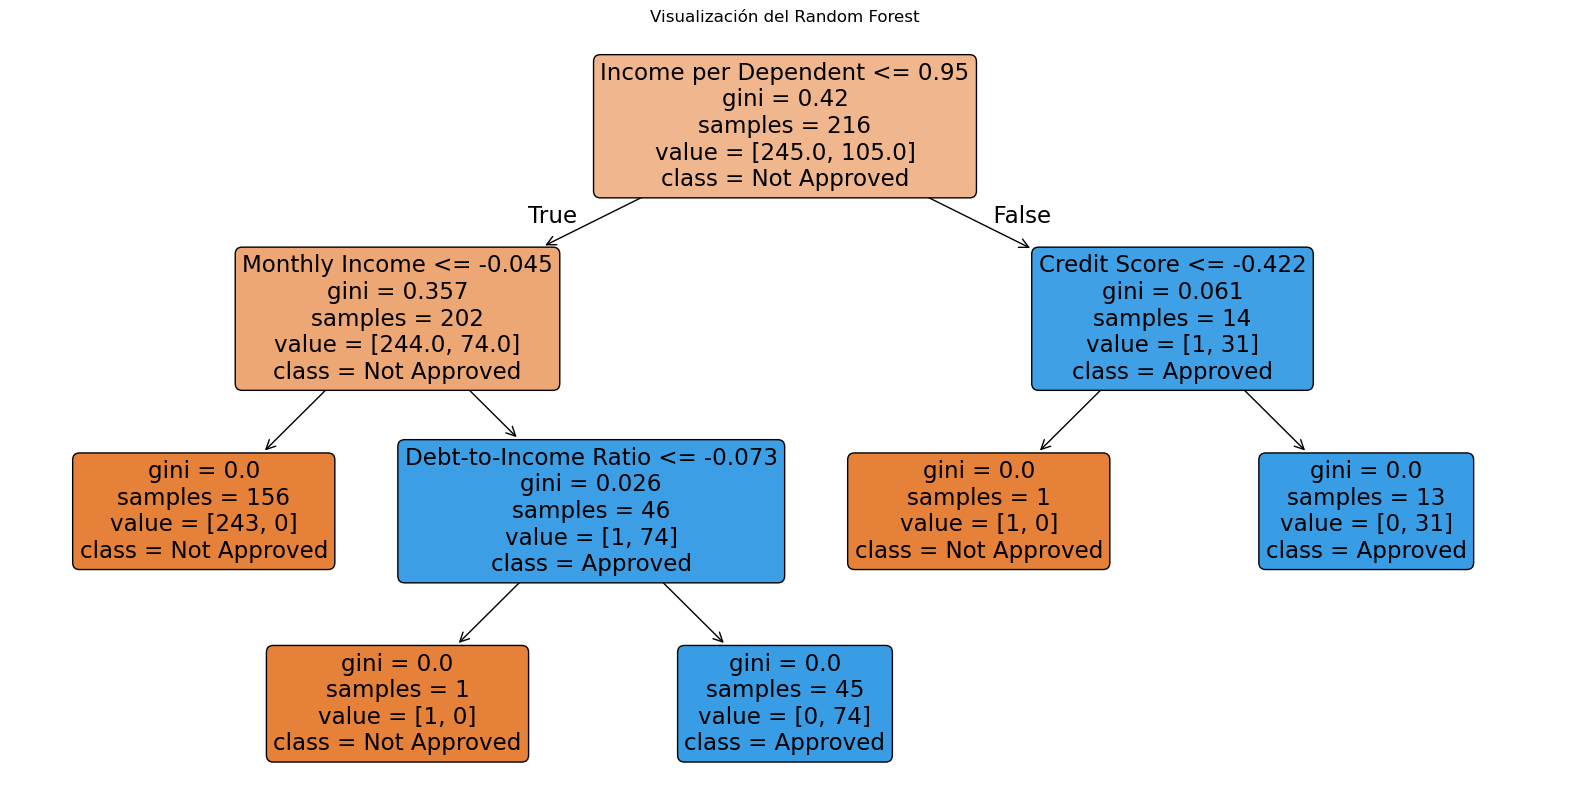

In [78]:
from sklearn.tree import plot_tree
# Visualizar el árbol con sus métricas de impureza
plt.figure(figsize=(20, 10))
plot_tree(
    single_tree,
    feature_names=parametros,
    class_names=['Not Approved', 'Approved'],
    filled=True,
    impurity=True,
    rounded=True
)
plt.title("Visualización del Random Forest")
plt.show()

In [79]:
print(y_pred)
print(np.count_nonzero(y_pred==1))
print(len(y_pred))

[1 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 1 0 0 0 1 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 1 1 0 0 0 0 1
 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1 0 0 0 0
 0 0]
40
150


En este caso nos predice con arboles si la persona es apta pra un prestamo o no. Y se ve en el ejemplo de la figura como según ciertos parametros de los valores que se le dieron se obtiene el aprobado o no. Esto basado en el índice de Gini, el cual mide la probabilidad de clasificar incorrectamente un punto se se slecciona aleatoriamente según la distribución de clases del nodo.

Ahora miremos un último modelo con una red neuronal

In [80]:
# para la nn dividamos de nuevo el data frame y veamos como queda

# df_combined2 = pd.concat([df_combined, db2], axis=1)
X_1 = df_combined[parametros] 
X_1 = pd.concat([X_1, df_combined['Loan Approved']], axis=1)


train_dataset = X_1.sample(frac=0.8, random_state=0)
test_dataset = X_1.drop(train_dataset.index)

train_labels = train_dataset.pop('Loan Approved')
test_labels = test_dataset.pop('Loan Approved')

train_stats = train_dataset.describe()
train_stats = train_stats.transpose()
train_stats


,count,mean,std,min,25%,50%,75%,max
Monthly Income,400.0,7693.641196,1.364569e+04,7.000000,3500.000000,4800.000000,7200.000000,120000.000000
Credit Score,400.0,699.807641,6.490011e+01,500.000000,650.000000,700.000000,740.500000,900.000000
Years of Employment,363.0,4.393939,2.675171e+00,1.000000,2.500000,4.000000,6.000000,20.000000
Debt-to-Income Ratio,400.0,0.001636,2.140270e-02,0.000000,0.000357,0.000500,0.000690,0.428571
Income per Dependent,400.0,3626.916667,3.925274e+03,500.000000,2250.000000,2833.333333,3350.000000,33333.333333
avg_car_price,400.0,18555.927224,1.457014e-10,18555.927224,18555.927224,18555.927224,18555.927224,18555.927224
median_car_price,400.0,13172.000000,0.000000e+00,13172.000000,13172.000000,13172.000000,13172.000000,13172.000000
Price-to-Mileage-Ratio-avg,400.0,374799.472250,1.340453e-09,374799.472250,374799.472250,374799.472250,374799.472250,374799.472250
Income-to-Car Price Ratio,386.0,0.414628,7.486331e-01,0.000377,0.188619,0.242510,0.377238,6.466936


In [81]:
X_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 0 to 478
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Monthly Income              500 non-null    float64
 1   Credit Score                500 non-null    float64
 2   Years of Employment         457 non-null    float64
 3   Debt-to-Income Ratio        500 non-null    float64
 4   Income per Dependent        500 non-null    float64
 5   avg_car_price               500 non-null    float64
 6   median_car_price            500 non-null    float64
 7   Price-to-Mileage-Ratio-avg  500 non-null    float64
 8   Income-to-Car Price Ratio   483 non-null    float64
 9   Loan Approved               500 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 59.1 KB


In [82]:
test_dataset.head()

,Monthly Income,Credit Score,Years of Employment,Debt-to-Income Ratio,Income per Dependent,avg_car_price,median_car_price,Price-to-Mileage-Ratio-avg,Income-to-Car Price Ratio
9,90000.0,800.0,10.0,0.000044,2833.333333,18555.927224,13172.0,374799.47225,4.850202
26,10000.0,820.0,10.0,0.000500,2833.333333,18555.927224,13172.0,374799.47225,0.538911
29,2500.0,550.0,NaN,0.001411,2833.333333,18555.927224,13172.0,374799.47225,0.134728
32,3200.0,650.0,2.0,0.000313,2833.333333,18555.927224,13172.0,374799.47225,0.172452
33,6500.0,750.0,7.0,0.000462,2833.333333,18555.927224,13172.0,374799.47225,0.350292


In [83]:
train_dataset.head()

,Monthly Income,Credit Score,Years of Employment,Debt-to-Income Ratio,Income per Dependent,avg_car_price,median_car_price,Price-to-Mileage-Ratio-avg,Income-to-Car Price Ratio
94,3000.0,630.0,1.0,0.000333,3000.000000,18555.927224,13172.0,374799.47225,0.161673
264,100000.0,700.0,15.0,0.000040,33333.333333,18555.927224,13172.0,374799.47225,5.389114
294,3000.0,600.0,1.0,0.000333,2833.333333,18555.927224,13172.0,374799.47225,0.161673
459,7000.0,720.0,6.0,0.000429,2333.333333,18555.927224,13172.0,374799.47225,0.377238
475,6500.0,730.0,5.0,0.000462,2166.666667,18555.927224,13172.0,374799.47225,0.350292


In [84]:
par_nor = ['Monthly Income', 'Credit Score', 'Years of Employment',
    'Debt-to-Income Ratio', 'Income per Dependent', 
    'Income-to-Car Price Ratio']

train_dataset.fillna(0, inplace=True)
test_dataset.fillna(0, inplace=True)
train_dataset = train_dataset.div(train_dataset.max())
test_dataset = test_dataset.div(test_dataset.max())


train_dataset.describe()

,Monthly Income,Credit Score,Years of Employment,Debt-to-Income Ratio,Income per Dependent,avg_car_price,median_car_price,Price-to-Mileage-Ratio-avg,Income-to-Car Price Ratio
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.0,400.0,400.0,400.000000
mean,0.064114,0.777564,0.199375,0.003818,0.108807,1.0,1.0,1.0,0.061871
std,0.113714,0.072111,0.142457,0.049940,0.117758,0.0,0.0,0.0,0.114324
min,0.000058,0.555556,0.000000,0.000000,0.015000,1.0,1.0,1.0,0.000000
25%,0.029167,0.722222,0.100000,0.000833,0.067500,1.0,1.0,1.0,0.028333
50%,0.040000,0.777778,0.200000,0.001167,0.085000,1.0,1.0,1.0,0.037500
75%,0.060000,0.822778,0.300000,0.001610,0.100500,1.0,1.0,1.0,0.058333
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.000000


In [85]:
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

def nn_model():
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]))
    model.add(Dropout(0.2))
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    model.add(Dense(30, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    return model

model = nn_model()
model.summary()
    

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                640       
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 100)               6500      
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 batch_normalization_1 (Bat  (None, 100)               400       
 chNormalization)                                                
                                                                 
 dense_6 (Dense)             (None, 30)                3030      
                                                      

In [86]:
import tensorflow as tf
# optimizer = tf.keras.optimizers.Adam(lr=0.001)
optimizer = tf.keras.optimizers.RMSprop(0.001)

model.compile(optimizer=optimizer,
              loss='mse',
              metrics=['mse'])

decay_lr = tf.keras.callbacks.LearningRateScheduler(lambda x: 1e-3*0.99**x)

history = model.fit(train_dataset, train_labels, epochs=1000, callbacks=[decay_lr],
                    validation_split=0.2, verbose=0)

#validation_split is to save some data for the validation of the model 

In [87]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch 
hist.tail()

,loss,mse,val_loss,val_mse,lr,epoch
995,0.054940,0.054940,0.047558,0.047558,4.539611e-08,995
996,0.048110,0.048110,0.047630,0.047630,4.494215e-08,996
997,0.051750,0.051750,0.047655,0.047655,4.449273e-08,997
998,0.049813,0.049813,0.047671,0.047671,4.404780e-08,998
999,0.067001,0.067001,0.047645,0.047645,4.360732e-08,999


In [88]:
def plot_history(history):     
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error')
  plt.plot(hist['epoch'], hist['mse'],'r--',
           label='Training Error')
  plt.plot(hist['epoch'], hist['val_mse'],'b',
           label = 'Validation Error')
  plt.ylim([0,hist['mse'].max()])
  plt.legend()
  plt.show()

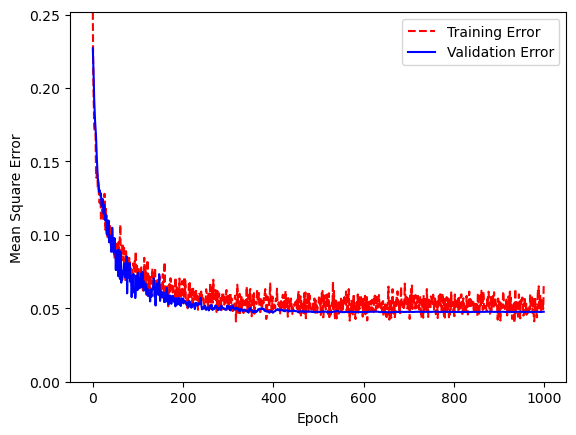

In [89]:
plot_history(history)

In [90]:
# to evaluate
loss, mse = model.evaluate(test_dataset, test_labels)
print("Testing set Mean Sqr Error: {:5.2f} ".format(mse))
# model.evaluate(test_dataset, test_labels)

4/4 [==============================] - 0s 2ms/step - loss: 0.0488 - mse: 0.0488
Testing set Mean Sqr Error:  0.05 


In [91]:
# para cuando tengamos que predecir se usa los siguiente 
# predictions = model.predict(X)
# binary_predictions = (predictions > 0.5).astype(int)

In [92]:
X_2 = df_combined[parametros]
X_2.fillna(0, inplace=True)

/tmp/ipykernel_1159/2293811063.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_2.fillna(0, inplace=True)


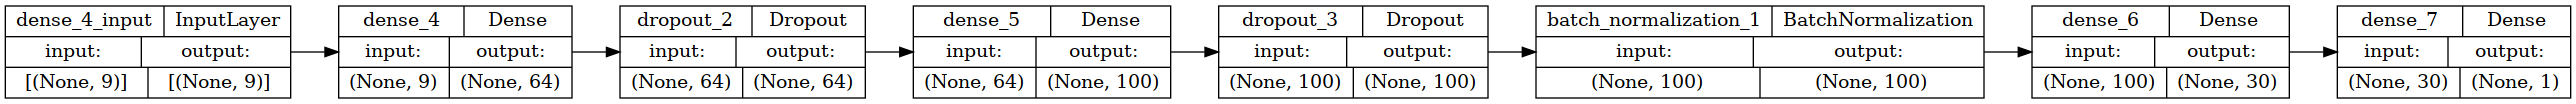

In [95]:
from tensorflow import keras 
keras.utils.plot_model(model, 'model.png', show_shapes=True, rankdir="LR")

## Conclusiones

Se observa que se tiene un buen valor de MSE para el training y el test, por lo que el modelo podría a llegar a tener buenas predicciones, con un margen de 5% o menor. En los tres casos o modelos lo que se hizo fue entrenar una maquina para que si se quiere probar otros nuevos casos esta pueda predecir o ayudarnos a decidir si se hace el prestamo o no. Por lo que la propuesta es usar estos modelos como ayuda para toma de decisiones en el caso de prestamos. No son modelos totalmente confiables porque siempre hay una cantidad de error, entonces lo mejor es que se combinen con la experticia profesional. 

En tema de la calidad de datos se tiene una gran necesidad para estos modelos predictivos de tener bien los valores de a quines se le prestaron en el pasado para así poder entrenar de una mejor manera los modelos. Además que seria mejor tener una forma más estandar de clasificar ciertos valores como el estado financiero debido a que las palabras no son tan precisas como una escala númerica. 

Otro aspecto, es conocer más sobre que nuevas variables pueden ser muy importantes, para esto seria crucial tener la opinión de alguien en temas financieros que conozca que parametros son usualmente los que mejor reflejan situaciones económicas positivas para que se pueda ser aprovado el prestamo. En mi caso yo tomé las que se hacían lógicas para mi, pero me imagino que pueden existir mejores variables para tener en cuenta. 



Los modelos presentados cumplen con su propósito inicial, proporcionando una visión general tanto de las ventas como de las proyecciones relacionadas con préstamos. Estos resultados ofrecen una base valiosa para la toma de decisiones estratégicas en la empresa.

Sin embargo, para mejorar la precisión y relevancia de los modelos, sería ideal contar con datos más completos y representativos, como un historial detallado de ventas y un registro robusto de préstamos previos. Estos datos permitirían refinar los modelos y ajustarlos mejor a las necesidades específicas de la empresa, aumentando así su capacidad para predecir escenarios futuros con mayor exactitud.

Además, el análisis constante y la actualización de los datos en los modelos garantizarían que se adapten a posibles cambios en las condiciones del mercado o en los comportamientos de los consumidores. De este modo, la empresa no solo obtendría predicciones más confiables, sino también una herramienta dinámica para responder rápidamente a nuevos desafíos y oportunidades.